In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# https://stackoverflow.com/questions/50695226/how-to-get-the-optimal-number-of-clusters-using-hierarchical-cluster-analysis-au

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.nunique()

Chromosome                       162
Start                          19057
Stop                           19065
Strand                             2
Gene Symbol                    19107
gene_biotype                      15
gene_name                      12642
gene_source                        2
tag                                2
transcript_biotype                15
transcript_source                  2
GC-JN-9178-12-IC_S13            3020
GC-JN-9178-9-OC_S10             1937
GC-JN-9178-9-R_S6               3016
GC-JN-9178-Ctrl-IC_S8           3513
GC-JN-9178-12-R_S5              3376
GC-JN-9178-13-R_S11             3011
GC-JN-9178-13-OC_S3             3489
GC-JN-9178-Ctrl-OC_S9           3749
GC-JN-9178-13-IC_S7             3008
GC-JN-9178-11-R_S4              3648
GC-JN-9178-10-R_S15             3065
GC-JN-9178-11-OC_S17            2786
GC-JN-9178-10-OC_S2             3193
GC-JN-9178-9-IC_S12             3528
GC-JN-9178-11-IC_S16            2609
GC-JN-9178-12-OC_S14            3491
G

In [4]:
df.dtypes

Chromosome                      object
Start                            int64
Stop                             int64
Strand                          object
Gene Symbol                     object
gene_biotype                    object
gene_name                       object
gene_source                     object
tag                             object
transcript_biotype              object
transcript_source               object
GC-JN-9178-12-IC_S13           float64
GC-JN-9178-9-OC_S10            float64
GC-JN-9178-9-R_S6              float64
GC-JN-9178-Ctrl-IC_S8          float64
GC-JN-9178-12-R_S5             float64
GC-JN-9178-13-R_S11            float64
GC-JN-9178-13-OC_S3            float64
GC-JN-9178-Ctrl-OC_S9          float64
GC-JN-9178-13-IC_S7            float64
GC-JN-9178-11-R_S4             float64
GC-JN-9178-10-R_S15            float64
GC-JN-9178-11-OC_S17           float64
GC-JN-9178-10-OC_S2            float64
GC-JN-9178-9-IC_S12            float64
GC-JN-9178-11-IC_S16     

In [5]:
df.select_dtypes(include='object').columns

Index(['Chromosome', 'Strand', 'Gene Symbol', 'gene_biotype', 'gene_name',
       'gene_source', 'tag', 'transcript_biotype', 'transcript_source'],
      dtype='object')

In [6]:
df.dropna(inplace=True)

In [7]:
df['Strand'] = df['Strand'].replace(['+','-'],[1,0])
df['tag'] = df['tag'].replace(['---','seleno'],[1,0])
df['gene_source'] = df['gene_source'].replace(['ensembl','RefSeq'],[1,0])
df['transcript_source'] = df['transcript_source'].replace(['ensembl','RefSeq'],[1,0])
df['transcript_biotype'] = df['transcript_biotype'].replace(df['transcript_biotype'].unique(),range(len(df['transcript_biotype'].unique())))
df['gene_biotype'] = df['gene_biotype'].replace(df['gene_biotype'].unique(),range(len(df['gene_biotype'].unique())))
df['Chromosome'] = df['Chromosome'].replace(df['Chromosome'].unique(),range(len(df['Chromosome'].unique())))
df.drop('Gene Symbol',axis=1,inplace=True)
df.drop('gene_name',axis=1,inplace=True)

In [8]:
df.dtypes

Chromosome                       int64
Start                            int64
Stop                             int64
Strand                           int64
gene_biotype                     int64
gene_source                      int64
tag                              int64
transcript_biotype               int64
transcript_source                int64
GC-JN-9178-12-IC_S13           float64
GC-JN-9178-9-OC_S10            float64
GC-JN-9178-9-R_S6              float64
GC-JN-9178-Ctrl-IC_S8          float64
GC-JN-9178-12-R_S5             float64
GC-JN-9178-13-R_S11            float64
GC-JN-9178-13-OC_S3            float64
GC-JN-9178-Ctrl-OC_S9          float64
GC-JN-9178-13-IC_S7            float64
GC-JN-9178-11-R_S4             float64
GC-JN-9178-10-R_S15            float64
GC-JN-9178-11-OC_S17           float64
GC-JN-9178-10-OC_S2            float64
GC-JN-9178-9-IC_S12            float64
GC-JN-9178-11-IC_S16           float64
GC-JN-9178-12-OC_S14           float64
GC-JN-9178-10-IC_S1      

In [9]:
df

,Chromosome,Start,Stop,Strand,gene_biotype,gene_source,tag,transcript_biotype,transcript_source,GC-JN-9178-12-IC_S13,...,GC-JN-9178-10-R_S15,GC-JN-9178-11-OC_S17,GC-JN-9178-10-OC_S2,GC-JN-9178-9-IC_S12,GC-JN-9178-11-IC_S16,GC-JN-9178-12-OC_S14,GC-JN-9178-10-IC_S1,BLGCSEQ0192-RNAControl1_S18,BLGCSEQ0192-RNAControl3_S20,BLGCSEQ0192-RNAControl2_S19
0,0,4285,46724,1,0,1,1,0,1,180722.00000,...,141996.00000,54700.9,387561.00000,241846.00000,56451.0,208340.00,380305.00000,7947.01,10492.0,10051.0
1,1,62438017,62485538,1,1,1,1,1,1,1267.99000,...,737.00000,1907.0,611.00000,1036.01000,679.0,2414.04,145.00000,2.00,5.0,6.0
2,1,62603252,62648102,0,1,1,1,1,1,13.00000,...,0.00000,9.0,4.00000,12.00000,0.0,13.00,1.00000,0.00,0.0,0.0
3,1,6083444,6105925,1,1,1,1,1,1,270.00000,...,265.00000,175.0,412.00000,413.99900,225.0,337.00,259.00000,0.00,0.0,1.0
4,1,18526076,18537831,0,1,1,1,1,1,6.00000,...,6.00000,3.0,9.00000,5.00000,9.0,7.00,9.00000,0.00,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19102,13,50043115,50155355,0,1,1,1,1,1,149.00000,...,200.00000,91.0,146.00000,272.00000,123.0,244.00,118.00000,11.00,8.0,8.0
19103,8,135606192,135741488,1,1,1,1,1,1,160.00000,...,303.00000,183.0,290.00000,272.00000,100.0,289.00,485.00000,16.00,16.0,26.0
19104,3,179457208,179686472,0,10,1,1,10,1,1.00253,...,2.00458,0.0,1.00359,1.00406,0.0,0.00,2.00619,0.00,0.0,0.0
19105,7,95486782,95486865,0,10,1,1,10,1,2.00000,...,4.00000,1.0,0.00000,0.00000,0.0,0.00,2.00000,0.00,0.0,0.0


In [10]:
X = df.values

In [11]:
X.shape

(19107, 29)

In [12]:
# import scipy.cluster.hierarchy as sch
# dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
# plt.title('Dendrogram')
# plt.show()

In [13]:
# # Fitting Hierarchical Clustering to the dataset
# from sklearn.cluster import AgglomerativeClustering
# hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# y_hc = hc.fit_predict(X)

       Hierarchical Clustering demo - num of clusters       
 
Number of clusters = 19076


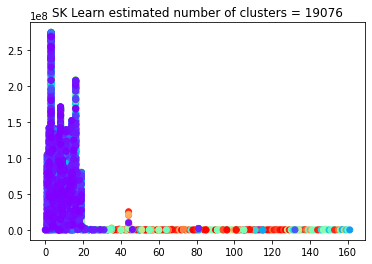

In [14]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import path

# Special imports
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

print("Hierarchical Clustering")

data = X 

# # Plot dendrogram using SciPy
# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(data, method='ward'))

# plt.show()


# Initialize hiererchial clustering method, in order for the algorithm to determine the number of clusters
# put n_clusters=None, compute_full_tree = True,
# best distance threshold value for this dataset is distance_threshold = 200
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=200)

# Cluster the data
cluster.fit_predict(data)

print(f"Number of clusters = {1+np.amax(cluster.labels_)}")

# Display the clustering, assigning cluster label to every datapoint 
# print("Classifying the points into clusters:")
# print(cluster.labels_)

# Display the clustering graphically in a plot
plt.scatter(data[:,0],data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title(f"SK Learn estimated number of clusters = {1+np.amax(cluster.labels_)}")
plt.show()

print(" ")